In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import math_optimization_library as optlib
import autograd.numpy as np
from matplotlib import gridspec
import math
%matplotlib notebook

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2
from mlrefined_libraries import basics_library as baslib


As described in our series on the *vital elements of calculus* the *first order condition for optimality* is a powerful calculus-based way of characterizing the minima of a function.  This condition states that stationary points - which include local minima, maxima, and saddle points - must satisfy the system of equations $\nabla g(\mathbf{w}) = \mathbf{0}_{N\times 1}$ or written out individually

\begin{array}
\
\frac{\partial}{\partial w_{1}}g(\mathbf{w})=0,\\
\frac{\partial}{\partial w_{2}}g(\mathbf{w})=0,\\
\,\,\,\,\,\,\,\,\,\,\vdots \\
\frac{\partial}{\partial w_{N}}g(\mathbf{w})=0.
\end{array}

If we could solve such systems in general directly ('by hand') the minimization problem would be solved.  Unfortunately, as we saw previously, this can rarely be done.  First and foremost, even in with a single variable $g(w)$ this system - which reduces to a single equation - can be impossible to solve by hand.  Greatly compounding this issue is the fact that solving a system of $N$ simultaneous equations 'by hand' - even when each individual equation is extremely simple (e.g., a linear combination) - is virtually impossible.  

Here we describe our first mathematical optimization algorithm - called *coordinate descent* - that is specifically designed to deal with the latter problem (the *simulatenous* system of $N$ equations part).  It is perhaps the first thing one might try in order to salvage the first order condition as a way of directly finding local minima.  Nonetheless though it is extremely simple coordinate descent is still the most widely used optimization method for a number of machine learning problems - largely in the realm of *unsupervised learning* including K-Means clustering, nonnegative matrix factorization problems, recommender systems, and general matrix factorization problems.

## 2.1  From simultaneous to cyclic equations

With coordinate descent instead of trying to solve the $N$ equations simultaneously, we break up the system into its individual equations and solve each one-by-one using the first order condition.  Then if each of the equations is relatively simple we can easily solve them in a one-off fashion.  Of course solving each equation alone a single time is not equivalent to solving the whole system together, so we have to cycle through the system a number of times repeatedly solving each individual equation in order for the solution of this approach to approximate the true solution to the original simultaneous system.

If each individual equation cannot be solved by hand then the idea is sunk, since thus far we have no tools for solving such complex single-input equations (later we will see a method called *Newton's method* for doing this).  This intuitively implies that coordinate descent is limited to functions whose first order system consists of sinple single-input equations  we can indeed solve directly, which is generally speaking true.  

We walk through the method in detailing how it works in minimizing the quadratic function

$$
g(\mathbf{w}) = \mathbf{w}^T \mathbf{A} \mathbf{w} + \mathbf{b}^T \mathbf{w} + c
$$

that is convex (or upward facing) along each of its input dimensions.  As described in our post on quadratic functions, this means that the matrix $\mathbf{A}$ is symmetric and has all nonnegative eigenvalues.  For example in the next Python cell we plot the quadratic whose matrix $\mathbf{A} = \begin{bmatrix} \,\,\,\,\,5 \,\,\, -3 \\ -3 \,\,\,\,\,\,\,\, 5 \end{bmatrix}$ and $\mathbf{b} = \mathbf{0}_{2\times 1}$ and $c = 0$.

<IPython.core.display.Javascript object>


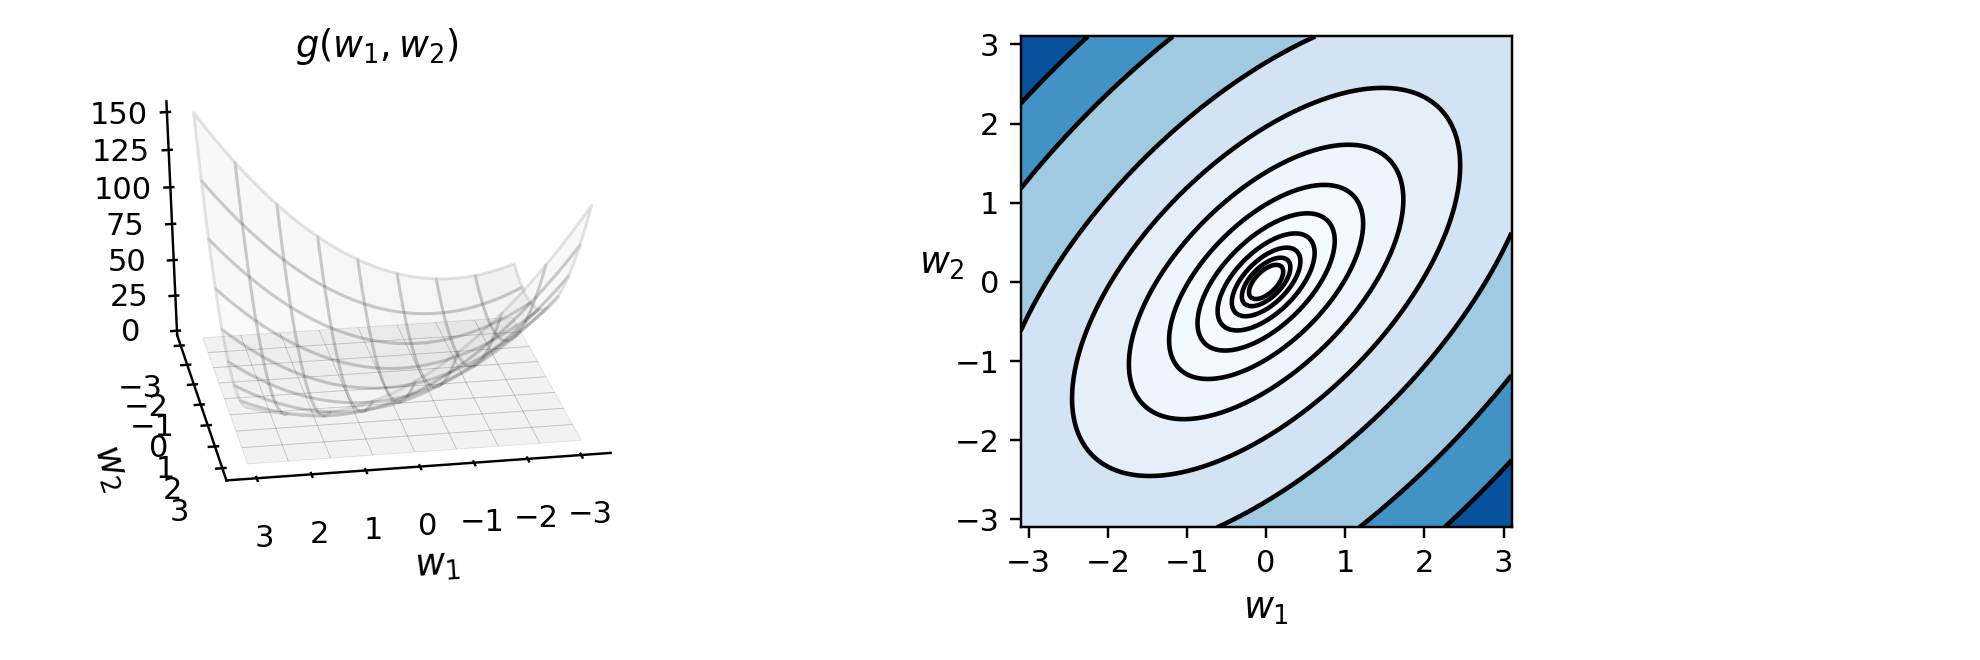

In [18]:
# what function should we play with?  Defined in the next line.
g = lambda w: 5*w[0]**2 + 5*w[1]**2 - 6*w[0]*w[1]

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.plot3d.visualizer();

demo.draw_2d(g,num_contours = 30,view = [30,80])

In [13]:
np.arange(-3,3)

array([-3, -2, -1,  0,  1,  2])